<h2><center>NLP Text Classification</h2>

## I. Introduction

### 1.1 Domain-specific area
This project provides an analysis of textual data on Twitter to accurately detect and classify sentiment trends in Tweets using sentiment analysis techniques. This would provide businesses with a tool that takes in a corpus of text for training to analyse the sentiment of tweets and assist in understanding the needs of their target audience.

### 1.2 Objectives

### 1.3 Dataset
To begin this project, an extensive amount of textual data corpora is required. After researching large datasets of Tweets, Twitter Tweets Sentiment Dataset on Kaggle was proven to be the best for this project. With 27.5 thousand tweets extracted using the Twitter API, the authors have categorised each tweet to have either a positive, neutral or negative sentiment, which is beneficial for the algorithm in categorising harmful texts.

The dataset consists of the textID, text (the original Tweets), selected_text (defined as the Tweets that do not have redundant information) and the sentiment of the tweet.

### 1.4 Evaluation methodology

## II. Implementation

### 2.1 Preparation of dataset

#### Acquiring dataset
The dataset on the collection of Tweets were acquired from Kaggle by downloading the CSV file. The owner of this dataset is M Yasser H. The code for importing the dataset is shown below:

#### Importing libraries
- **pandas library** was imported to process and handle datasets in Python. It is used to help write and read from CSV files while handling real-world messy data and processing them into a proper format

- **numpy library** was imported to handle calculations and use numpy arrays for statistical calculations

- **matplotlib library** was imported to plot the data and represent it graphically

- **os library** was imported to have a way of using the operating system dependent functionalities, more specifically to save the dataset as a CSV

- **stopwords library** was imported to have a library of the most common words in data to aid in stopwords removal

- **collections.Counter library** is a dictionary subclass that counts the frequency of elements. This helps to check for additional common words being used

- **ast library** was imported to convert a string that looked like a list to an actual list

- **WordNetLemmatizer library** was imported to perform lemmatisation on words. It reduces words to its base or dictionary form, known as the lemma

- **nltk.corpus library** was used to access contents of a diverse set of corpora

In [68]:
# The following block of code was self-written
# dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# text processing and analysis
import nltk
# stop words library
from stop_words import get_stop_words
# analysing text corpora
from collections import Counter

# modifying string to list
import ast
# stemming and lemmatisation
from nltk.stem import WordNetLemmatizer
# regular expressions
import re

# lexical analysis
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#### Helper function
As the dataset will be saved at each section for easier access to the CSV based on each progressive step, the saving step will be changed to a function.

In [69]:
# The following block of code was self-written
def save_to_csv(df,file_path):
    if not os.path.exists(file_path):
        df.to_csv(file_path, index = False)
        print('File saved successfully.')
    else:
        print('File already exists.')

#### Importing dataset
To check that the dataset is ready for cleaning and analysis, we will look at the first entry to check if there are headers. Since there are headers, and the dataset contains only relevant information, the text, and sentiment, the headers will just be modified to "tweet" and "sentiment" for better comprehension.

In [70]:
# The following block of code was self-written
df = pd.read_csv('datasets/twitter_sentiments.csv', nrows = 1)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral


In [71]:
# The following block of code was self-written
tweets_df = pd.read_csv('datasets/twitter_sentiments.csv')
tweets_df = tweets_df[['selected_text', 'sentiment']]
tweets_df.columns = ['tweet', 'sentiment']
tweets_df.head()

,tweet,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


### 2.2 Pre-processing
Completed steps:
- Removing NaN and duplicated entries
- Removing neutral sentiment entries, storing locally
- Pre-processing (basic text processing)
    - Removal of stop words + tokenisation + Regex
    - Frequency distribution (removal of additional stop words)
    - Lemmatisation
    - Lexical diversity + frequency distribution
    
(writeup not needed)

TO DO LIST:
- Convert/store the dataset locally and preprocess the data [**done**]
- Describe the text representation (e.g., bag of words, word embedding, etc.) [**not done**]
- any pre-processing steps you have applied and why they were needed (e.g. tokenisation [**done**], lemmatization [**done**])
- Describe the vocabulary and file type/format, e.g. CSV file. [**not done**]

#### Removing NaN entries
To ensure that the dataset contains only required information, we will check and remove any entries that have missing values.

#### Removing duplicated entries
To ensure that the analysis is beneficial, all entriesshould be unique. A 'duplicated' column will be added to the a temporary copy of the dataset which is the output of the duplicated() function and we will print only columns where the 'duplicated' column is True. Based on the output, it is seen that there are some duplicated Tweets.

#### Nature of Data
Although the dataset is seen to have an minutely imbalanced nature between negatives and positives and the focus is to detect positive and negative sentiments. As such all entries that do not have a neutral sentiment.

<b>The following blocks of code was self-written with references</b>
<br>checking for duplicates: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
<br>creation of sample from large dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [72]:
# The following block of code was self-written
sentiments = tweets_df['sentiment'].value_counts(dropna = False)
print("sentiments before cleaning:\n\n", sentiments)

# Removing NaN values
tweets_df.dropna(inplace = True)
# Removing duplicate entries
tweets_df.drop_duplicates(inplace = True)

sentiments = tweets_df['sentiment'].value_counts(dropna = False)
print("sentiments after cleaning:\n\n", sentiments)

sentiments before cleaning:

 sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64
sentiments after cleaning:

 sentiment
neutral     11111
negative     5861
positive     5537
Name: count, dtype: int64


In [73]:
# The following block of code was self-written
tweets_df = tweets_df[tweets_df['sentiment'] != 'neutral']

# Resetting index
tweets_df.reset_index(drop = True, inplace = True)
print('positive sentiments:', tweets_df[tweets_df['sentiment'] == 'positive'].shape[0])
print('neutral sentiments:', tweets_df[tweets_df['sentiment'] == 'neutral'].shape[0])
print('negative sentiments:', tweets_df[tweets_df['sentiment'] == 'negative'].shape[0])

positive sentiments: 5537
neutral sentiments: 0
negative sentiments: 5861


The tweets_df will now be saved into a new dataset for easier accessibility. To ensure that no duplicates are saved, a simple path checking will be used.

In [74]:
# The following block of code was self-written
filename = 'datasets/posNeg_twitter_sentiments.csv'
save_to_csv(tweets_df ,filename)
tweets_df = pd.read_csv(filename)

File already exists.


#### Basic text processing
To begin the process of analysing the text, we would require conducting the following basic text processing methods:
- Removal of stop words + tokenisation + Regex
- Frequency distribution (removal of additional stop words)
- Lemmatisation
- Lexical diversity + frequency distribution

- **Removing stop words**: In human language, it is very common for stop words to be present. These words, including **determiners** (eg: the, a, this, my), **conjunctions** (eg: and, or, nor, but, whereas) and **prepositions** (eg: against, along, at, before), are used to connect thoughts and speech to form grammatically accurate sentences or structural cohesion. While important during communication amongst one another, they do not carry importance or sentiments that would be valuable to this project, thus introducing noise. The removal would help to streamline the process to focus on words that would contribute more meaning to the sentiment of Tweets.

* tokenisation will be done in lowercase as all stopwords are in lowercase.

- **Regular expression (Regex)**: To ensure that the analysis is only on alphabetical inputs, the use of Regex will remove all non-alphabetical characters.

In [75]:
# The following block of code was self-written
# Get stopword list
stop_words = get_stop_words('english')

# Checking removal works on a test text
test_tweet = 'This is a test that Stopword removal works.'

tokens = test_tweet.lower().split()
# Removing each token if part of stop_words
filtered_tokens = [token for token in tokens if token not in stop_words]
print("Filtered from", len(tokens), "to", len(filtered_tokens))

Filtered from 8 to 4


The following commented out code was the original self-written code that now is not being used.
<br>It was modified to aid in the stemming and lemmatisation in the next section

In [76]:
# The following block of code was self-written
tweets = tweets_df['tweet'].tolist()

filtered_tweets = []
for tweet in tweets:
    tokens = tweet.lower().split()
    # Removing each token if part of stop_words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_tweet = " ".join(filtered_tokens)  # Convert tokens to a string
    filtered_tweets.append(filtered_tweet)

tweets_df['filtered_tweet'] = filtered_tweets
tweets_df['filtered_tweet'].replace('', np.nan, inplace = True)
tweets_df.dropna(inplace = True)

#### Regular expression
removes any non alphabeticals

<b>The following block of code was self-written with reference</b>
<br>using lambda: https://www.w3schools.com/python/python_lambda.asp

In [77]:
# The following block of code was self-written
# Removing all non alphabetical tokens
def clean_text_input(text):
    cleaned_text = re.sub(r'[^a-zA-Z ]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

print(clean_text_input('testing that 200000 is removed?'))

# Apply cleaning to each row of 'filtered_tweet'
tweets_df['filtered_tweet'] = tweets_df['filtered_tweet'].apply(clean_text_input)
tweets_df['filtered_tweet'].replace('', np.nan, inplace = True)
tweets_df.dropna(inplace = True)
tweets_df.head()

testing that is removed


,tweet,sentiment,filtered_tweet
0,Sooo SAD,negative,sooo sad
1,bullying me,negative,bullying
2,leave me alone,negative,leave alone
3,"Sons of ****,",negative,sons
4,fun,positive,fun


The removal of stopwords has reduced the texts. Due to the dataset chosen having the column named as 'selected_text' which is cleaned tweets done by the owner, as well as the cleaning of stopwords, and additional use of Regex, the text will now be examined.

#### Frequency distribution
By making use of the **collections.Counter library**, it would allow the most used words to be displayed. Based on the output, it is seen that there are additional stopwords that were not in the stopwords library that should be removed. As such, the stopwords will be removed such that the top 30 used words are not stopwords. (Words that do not seem to have a positive or negative sentiment will be considered a 'stopword' in this stage. As some stopwords paired with other non-stopwords may change the sentiment, words that carry negations will not be removed.)

<b>The following blocks of code was self-written with reference</b>
<br>collections library: https://www.digitalocean.com/community/tutorials/python-counter-python-collections-counter

In [91]:
# The following block of code was self-written
# Concatenate all tokenised words together
tokenised_words = []
for tweet in tweets_df['filtered_tweet']:
    tokens = tweet.split()
    for t in tokens:
        tokenised_words.append(t)
        
word_counts = Counter(tokenised_words)

im: 619
good: 594
day: 501
love: 435
happy: 380


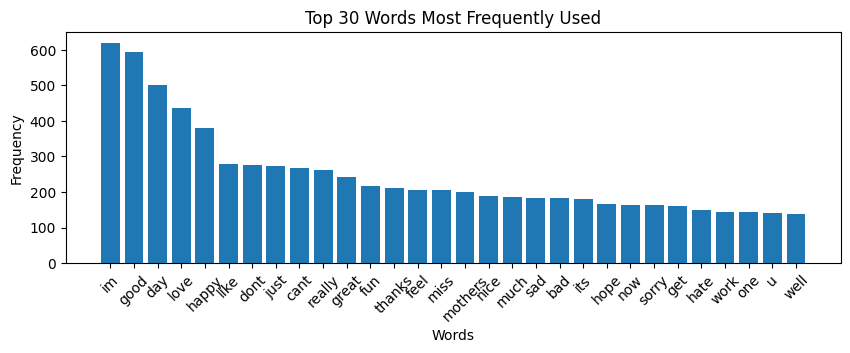

In [92]:
# The following block of code was self-written
# Displays top 10 used words and their frequencies
most_used_words = word_counts.most_common(5)
for word, count in most_used_words:
    print(f"{word}: {count}")

# Get top 30 most used words
most_used_words = word_counts.most_common(30)
# Extract the words and their frequencies
words, frequencies = zip(*most_used_words)

# Plot the word frequencies
plt.figure(figsize=(10, 3))
plt.bar(words, frequencies)

# Labelling and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Most Frequently Used')
# Rotate x-axis labels if needed
plt.xticks(rotation = 45)
plt.show()

In [113]:
words_to_remove = ['im', 'day', 'like', 'just', 'really', 'mothers', 'its', 'now', 'get', 'work',
                   'one', 'u', 'well', 'thats','you','today','go','it','going','time','got','will',
                   's', 'night', 'oh', 'e', 'still', 'think', 'feeling', 'want', 'see']

tweets_df['filtered_tweet'] = tweets_df['filtered_tweet'].apply(lambda tweet: ' '.join(
    word for word in tweet.split() if word.lower() not in words_to_remove))

In [114]:
# The following block of code was self-written
# Concatenate all tokenised words together
tokenised_words = []
for tweet in tweets_df['filtered_tweet']:
    tokens = tweet.split()
    for t in tokens:
        tokenised_words.append(t)
        
word_counts = Counter(tokenised_words)

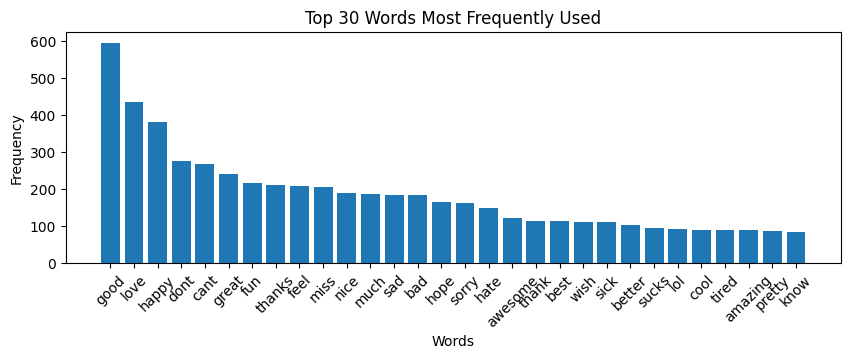

In [116]:
# The following block of code was self-written    
# Get top 30 most used words
most_used_words = word_counts.most_common(30)
# Extract the words and their frequencies
words, frequencies = zip(*most_used_words)

# Plot the word frequencies
plt.figure(figsize=(10, 3))
plt.bar(words, frequencies)

# Labelling and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Most Frequently Used')
# Rotate x-axis labels if needed
plt.xticks(rotation = 45)
plt.show()

In [43]:
# The following block of code was self-written
filename = 'datasets/filtered_twitter_sentiments.csv'
save_to_csv(tweets_df ,filename)
tweets_df = pd.read_csv(filename)

File already exists.


#### Lemmatisation
The first step before lemmatisation is to ensure that the input is a string, as the column filtered_tweets seem to be a string looking like a list, we would have to resolve that issue before starting lemmatisation.

** writeup on lemmatisation

<b>The following blocks of code was self-written with reference</b>
<br>literal_eval: https://docs.python.org/3/library/ast.html
<br>understanding lemmatisation: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [62]:
## The following block of code was self-written
#nan_entries = tweets_df[tweets_df.isna().any(axis = 1)]
#print("Before cleaning:\n", nan_entries)
#tweets_df.dropna(inplace = True)
#nan_entries = tweets_df[tweets_df.isna().any(axis = 1)]
#print("\nAfter cleaning:\n", nan_entries)

In [63]:
## The following block of code was self-written
#filename = 'datasets/cleaned_Twitter_Data_Sentiments.csv'
#save_to_csv(tweets_df, filename)
#tweets_df = pd.read_csv(filename)

#### Removing NaN entries
As Regex and stop words removal can cause entries to be invalid, the removal of NaN entries will be done.

#### Lexical diversity
Lexical analysis is used as a metric to measure the variety or richness of the vocabulary used in a text corpora. This helps to gain understanding to the complexity of the data being used.

$$\text{Lexical Diversity} = \frac{\text{Total Number of Unique Words}}{\text{Total Number of Words}}$$

Based on the output, the language used in both positive and negative sentiments is slightly less diverse compared to the neutral sentiments. However, since the difference is minute, it would suggest that the vocabulary used and linguistic complexity are similar across all sentiments. This is a valid statement as the dataset consists of already modified tweets by the owner of the dataset.

In [64]:
## The following block of code was self-written
#positive_sentiments = tweets_df[tweets_df['sentiment'] == 1]
#neutral_sentiments = tweets_df[tweets_df['sentiment'] == 0]
#negative_sentiments = tweets_df[tweets_df['sentiment'] == -1]
#
#positive_tokens = positive_sentiments['lemmatized_tweet'].str.split()
#neutral_tokens = neutral_sentiments['lemmatized_tweet'].str.split()
#negative_tokens = negative_sentiments['lemmatized_tweet'].str.split()
#
#def calc_lexicalDiversity(tokens):
#    # Exclude empty string from tokens
#    tokens = [token for token in tokens if token]
#    # Counts all tokens
#    total_tokens = sum(len(token) for token in tokens)
#    # Creates set of unique tokens
#    unique_tokens = set(token for sublist in tokens for token in sublist)
#    # Counts set of unique tokens
#    unique_total_tokens = len(unique_tokens)
#    return unique_total_tokens / total_tokens
#
#positive_lexical_diversity = calc_lexicalDiversity(positive_tokens)
#neutral_lexical_diversity = calc_lexicalDiversity(neutral_tokens)
#negative_lexical_diversity = calc_lexicalDiversity(negative_tokens)
#
#print("positive lexical diversity:", positive_lexical_diversity)
#print("neutral lexical diversity:", neutral_lexical_diversity)
#print("negative lexical diversity:", negative_lexical_diversity)

#### Text representation - Term Frequency-Inverse Document Frequency (TF-IDF): 

<b>The following blocks of code was self-written with heavy reference</b>
<br>TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [66]:
## The following block of code was self-written
#from sklearn.feature_extraction.text import TfidfVectorizer
#
#vectorizer = TfidfVectorizer()
## Fit the vectorizer to 'lemmatized_tweet' column
#vectorizer.fit(tweets_df['filtered_tweet'])
## Transform the 'lemmatized_tweet' column into TF-IDF matrix
#tfidf_matrix = vectorizer.transform(tweets_df['filtered_tweet'])
## Convert the TF-IDF matrix to array
#tfidf_array = tfidf_matrix.toarray()
#
## Print feature names (words)
#feature_names = vectorizer.get_feature_names_out()
#print("Feature Names:", feature_names)
## Print BoW matrix
#print("TF-IDF Matrix:")
#print(tfidf_array)

### 2.3 Baseline performance
(writeup not needed)

### 2.4 Classification approach
(writeup not needed)

### 2.5 Coding style
(writeup not needed)

## III. Conclusions

### 3.1 Evaluation

### 3.2 Summary and conclusions

## Temporary reference list
* to use citation generator

- 